In [70]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

dados = pd.read_csv('pokemon.csv')
dados

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [74]:
tipos1 = dados['type1']
l = tipos1.value_counts()

tipos_pokemon=list(l.index) #todos os tipos


In [75]:
l

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

(array([ 78.,  52., 114.,  72., 105.,  32.,  39.,  32.,  18.,  28.,  53.,
         45.,  27.,  23.,  27.,  29.,  24.,   3.]),
 array([ 0.        ,  0.94444444,  1.88888889,  2.83333333,  3.77777778,
         4.72222222,  5.66666667,  6.61111111,  7.55555556,  8.5       ,
         9.44444444, 10.38888889, 11.33333333, 12.27777778, 13.22222222,
        14.16666667, 15.11111111, 16.05555556, 17.        ]),
 <a list of 18 Patch objects>)

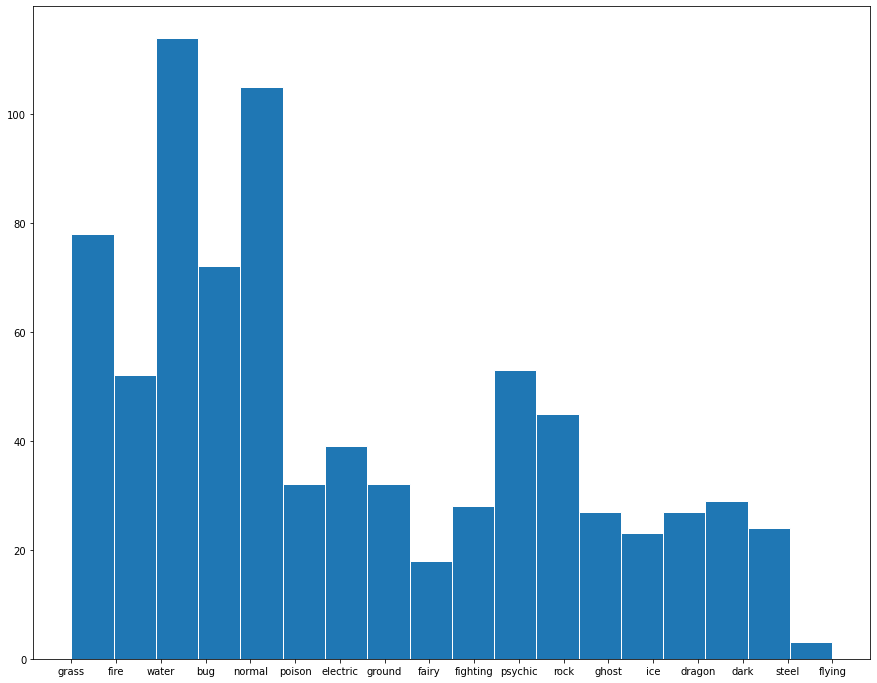

In [76]:
#plotando histograma de frequencia para o tipo 1 de cada pokemon
plt.figure(figsize=(15, 12))
plt.hist(tipos1,bins=len(tipos_pokemon),edgecolor='white',align='mid')

In [79]:
#Qual o ataque medio de cada tipo de pokemon?
df = dados.loc[:,['type1','sp_attack']]

for tipo in tipos_pokemon:
    filtra_tipo = df['type1'] == tipo
    media_ataque_do_tipo = df.loc[filtra_tipo,'sp_attack'].mean()
    print("A media do ataque dos pokemons do tipo {0} = {1:.3f}".format(tipo,media_ataque_do_tipo))

A media do ataque dos pokemons do tipo water = 74.061
A media do ataque dos pokemons do tipo normal = 56.981
A media do ataque dos pokemons do tipo grass = 74.321
A media do ataque dos pokemons do tipo bug = 56.653
A media do ataque dos pokemons do tipo psychic = 92.604
A media do ataque dos pokemons do tipo fire = 87.731
A media do ataque dos pokemons do tipo rock = 63.200
A media do ataque dos pokemons do tipo electric = 87.538
A media do ataque dos pokemons do tipo ground = 51.938
A media do ataque dos pokemons do tipo poison = 61.562
A media do ataque dos pokemons do tipo dark = 74.517
A media do ataque dos pokemons do tipo fighting = 50.107
A media do ataque dos pokemons do tipo dragon = 89.593
A media do ataque dos pokemons do tipo ghost = 82.444
A media do ataque dos pokemons do tipo steel = 72.708
A media do ataque dos pokemons do tipo ice = 77.435
A media do ataque dos pokemons do tipo fairy = 81.500
A media do ataque dos pokemons do tipo flying = 84.000


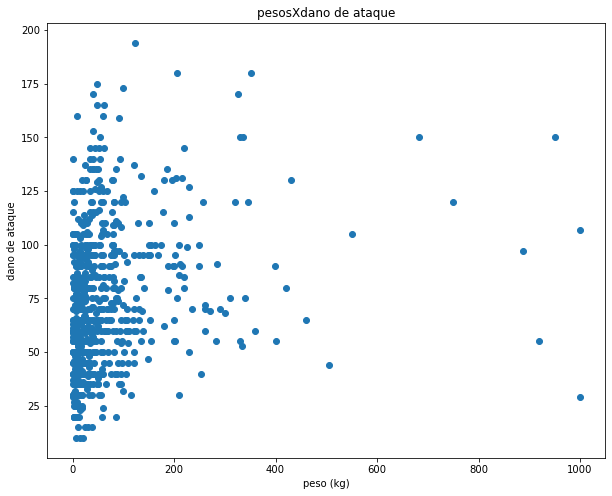

In [87]:
#Quanto maior o peso do pokemon mais forte ele eh?
lista_pesos = list(dados['weight_kg'])
lista_ataque = list(dados['sp_attack'])
plt.figure(figsize=(10, 8))
plt.title('pesosXdano de ataque')
plt.xlabel('peso (kg)')
plt.ylabel('dano de ataque')
plt.scatter(lista_pesos,lista_ataque)
plt.show()